0
true label: 7; predicted label: 7, 1.0


/home/vzantedeschi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


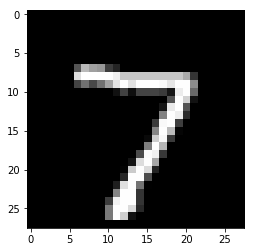

In [14]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from config import DATA_PATH

from src.classifiers.cnn import CNN
from src.classifiers.utils import load_classifier
from src.utils import load_mnist

%matplotlib inline

eps = 0.1

# get instances
_, (X_test, Y_test) = load_mnist()
X_advs = np.load(DATA_PATH + "/adversarial/mnist/cnn/fgsm/eps%.2f_train.npy" % (eps))

# get classifier
classifier = load_classifier(DATA_PATH + "/classifiers/mnist/cnn/relu/", "best-weights.h5")

# get labels
y_pred = classifier.predict(X_test)
y_pred_advs = classifier.predict(X_advs)

true_labels = np.argmax(Y_test, axis=1)
pred_labels = np.argmax(y_pred, axis=1)
adv_pred_labels = np.argmax(y_pred_advs, axis=1)

wellclass_idx = np.where(true_labels == pred_labels)[0]
fool_idx = np.where(adv_pred_labels != pred_labels)[0]

pic_index = 2
for pic_index in fool_idx:
    if pic_index in wellclass_idx:
        break

print(pic_index)

pred_max_conf, pred_label = max(y_pred[pic_index,:]), pred_labels[pic_index]
print("true label: {}; predicted label: {}, {}".format(true_labels[pic_index], pred_label, pred_max_conf))

pic = X_test[pic_index]
plt.imshow(pic.reshape((28, 28)), cmap="gray")

true label: 7; predicted label: 3, 0.9998699426651001


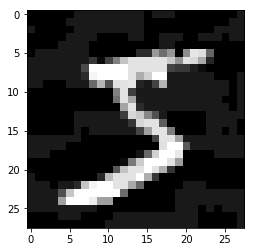

In [15]:
adv_max_conf, adv_label = max(y_pred_advs[pic_index,:]), adv_pred_labels[pic_index]
print("true label: {}; predicted label: {}, {}".format(true_labels[pic_index], adv_label, adv_max_conf))

pic_relu = X_advs[pic_index]
plt.imshow(pic_relu.reshape((28, 28)), cmap="gray")

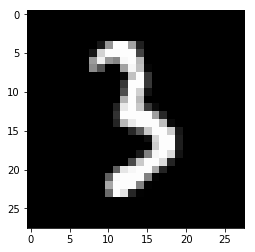

In [16]:
# get instances of label adv_label
class_idx = np.where(pred_labels == adv_label)

pic2 = X_test[class_idx][2,:]
plt.imshow(pic2.reshape((28, 28)), cmap="gray")

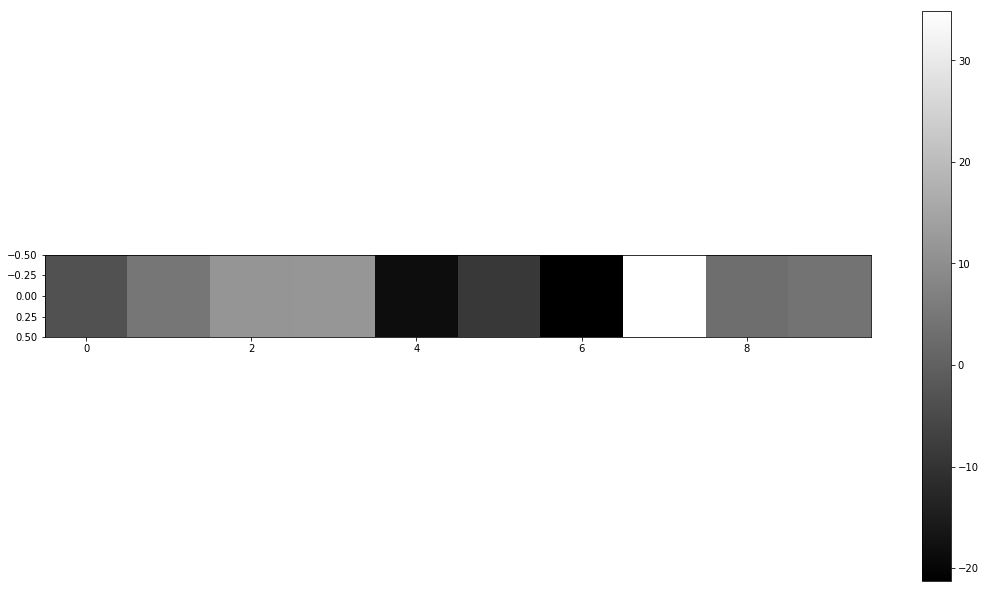

In [21]:
from keras import backend as K

layer_idx = -2

get_layer_output = K.function([classifier.model.layers[0].input],
                                  [classifier.model.layers[layer_idx].output])

# true example
true_output = get_layer_output([pic.reshape(1, *(pic.shape))])[0]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(true_output.reshape(-1, 10), cmap=plt.get_cmap('gray'))
fig.colorbar(im)


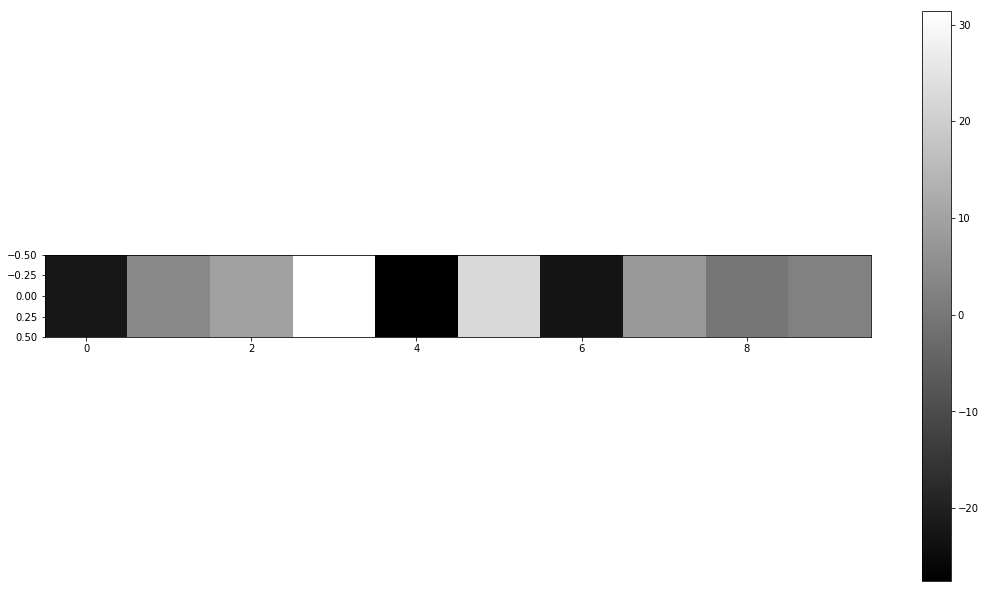

In [22]:
# adversarial examples
adv_output = get_layer_output([pic_relu.reshape(1, *(pic_relu.shape))])[0]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(adv_output.reshape(-1, 10), cmap=plt.get_cmap('gray'))
fig.colorbar(im)

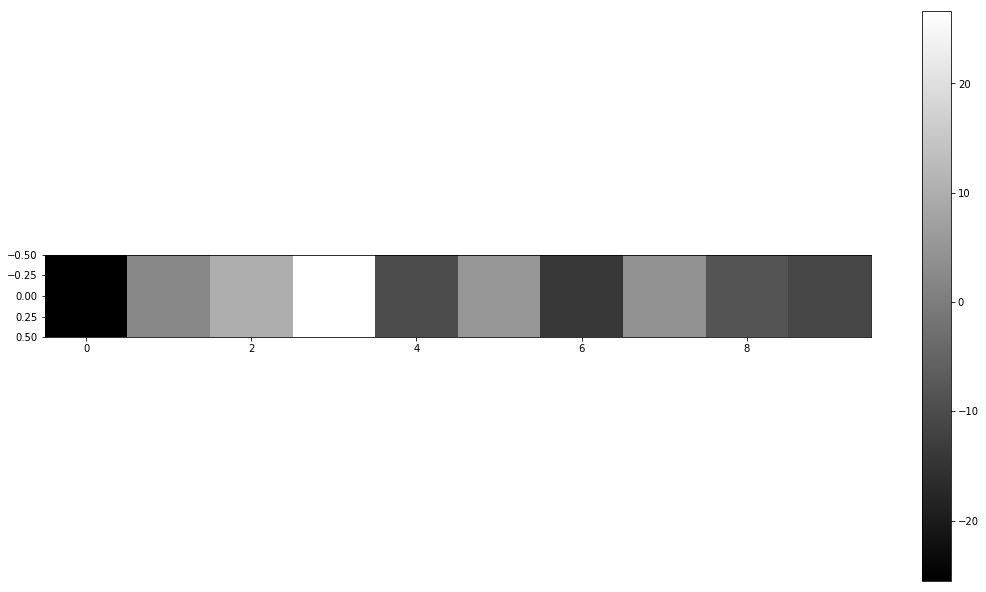

In [23]:
# true 8
eight_output = get_layer_output([pic2.reshape(1, *(pic_relu.shape))])[0]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(eight_output.reshape(-1, 10), cmap=plt.get_cmap('gray'))
fig.colorbar(im)

In [ ]:
diff = true_output - adv_output

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(diff.reshape(-1, 16), cmap=plt.get_cmap('gray'))
fig.colorbar(im)

In [ ]:
diff_eight = eight_output - adv_output

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(diff_eight.reshape(-1, 16), cmap=plt.get_cmap('gray'))
fig.colorbar(im)

In [ ]:
from functools import reduce
nb_units = reduce(lambda x, y: x*y, list(diff.shape))

pos_diff = np.where(diff > 0)
nb_pos_diff = len(pos_diff[0])
neg_diff = np.where(diff < 0)
nb_neg_diff = len(neg_diff[0])
nb_zero_diff = (nb_units - nb_pos_diff - nb_neg_diff)

print("negative, positive and null difference ratio of units")
print(nb_neg_diff/nb_units, nb_pos_diff/nb_units, nb_zero_diff/nb_units)

pos_norm = np.sum(diff[pos_diff])/nb_pos_diff
neg_norm = -np.sum(diff[neg_diff])/nb_neg_diff

print(neg_norm, pos_norm)

In [ ]:
pos_diff = np.where(diff_eight > 0)
nb_pos_diff = len(pos_diff[0])
neg_diff = np.where(diff_eight < 0)
nb_neg_diff = len(neg_diff[0])
nb_zero_diff = (nb_units - nb_pos_diff - nb_neg_diff)

print("negative, positive and null difference ratio of units")
print(nb_neg_diff/nb_units, nb_pos_diff/nb_units, nb_zero_diff/nb_units)

pos_norm = np.sum(diff_eight[pos_diff])/nb_pos_diff
neg_norm = -np.sum(diff_eight[neg_diff])/nb_neg_diff

print(neg_norm, pos_norm)